## 1)Importing libraries

In [66]:
#pip install pyforest

In [67]:
from pyforest import*
lazy_imports()

['from sklearn.preprocessing import LabelEncoder',
 'import matplotlib as mpl',
 'from sklearn.linear_model import LinearRegression',
 'import plotly.express as px',
 'import plotly.graph_objs as go',
 'from sklearn.linear_model import ElasticNetCV',
 'import skimage',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import tqdm',
 'import dash',
 'import altair as alt',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.manifold import TSNE',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.preprocessing import StandardScaler',
 'from dask import dataframe as dd',
 'import numpy as np',
 'from sklearn.decomposition import PCA',
 'from sklearn.preprocessing import MinMaxScaler',
 'from scipy import signal as sg',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.linear_model import Ridge',
 'import textblob',
 'import torch',
 'import lightgbm as lgb',
 'import glob',

In [68]:
# Reading the dataframe
df=pd.read_csv('BankNote_Authentication.csv')  
df.head()

<IPython.core.display.Javascript object>

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [69]:
# Checking dimensions
df.shape

(1372, 5)

In [70]:
# Is the atribute 'Class' balanced?
df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [71]:
# Yes, we have a balanced distribution for the variable 'Class' so we can use as a label

In [72]:
# Are there any nulls?
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [73]:
# Checking types of each atribute
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

## 2)Visualizations

In [74]:
# Ignoring warning
import warnings
warnings.filterwarnings('ignore')

### Univariate Data Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Distribution of "Class" Attribute'}, xlabel='class', ylabel='Density'>

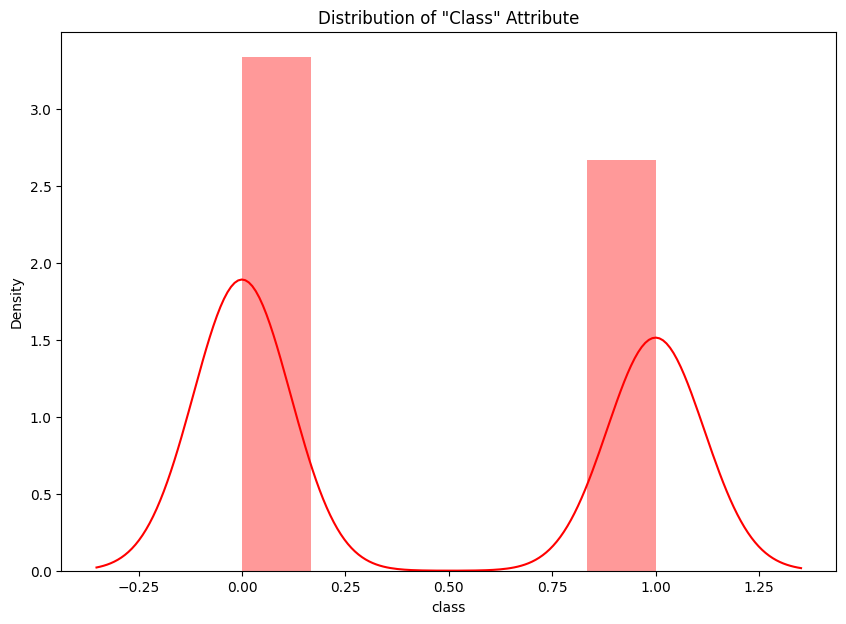

In [75]:
# Checking the class distribution
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')
sns.distplot(df['class'],color='red')

### Multivariate Data Analysis

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>,
        <Axes: title={'center': 'curtosis'}>],
       [<Axes: title={'center': 'entropy'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

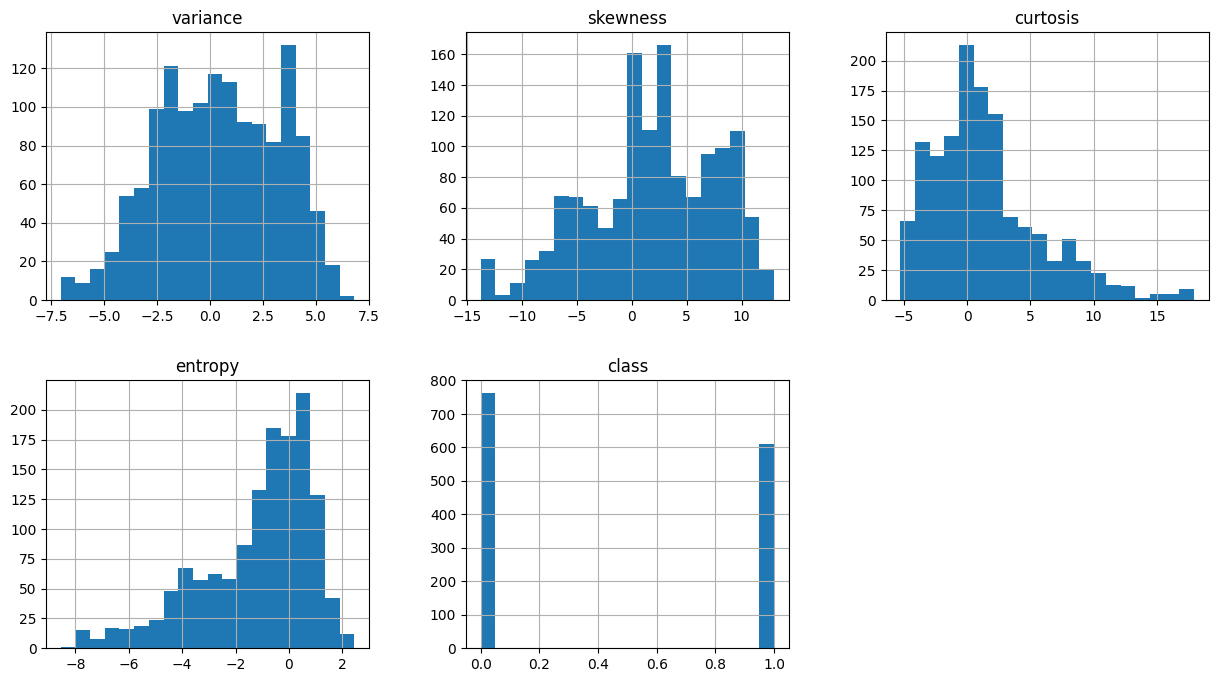

In [76]:
# Checking all the distributions
df.hist(bins=20, figsize=(15,8),layout=(2,3))

<IPython.core.display.Javascript object>

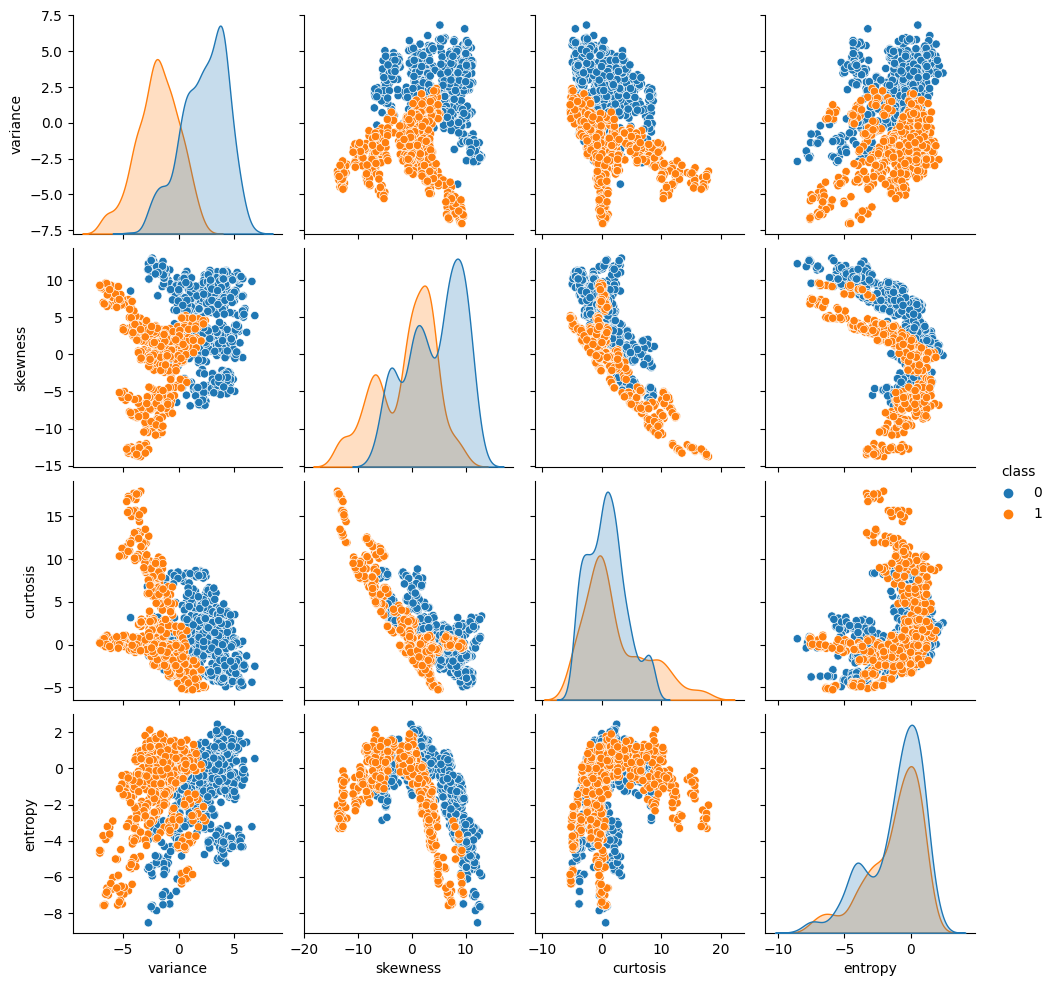

In [77]:
# Checking correlation between variables
sns.pairplot(df, hue="class")

In [78]:
# There is no significant correlation between the variables
# It is important to mention that we are also analizing statistic metrics, so it is not relevant

## 3)Preparing Our Data To Build Our Model

In [79]:
df.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [80]:
# We will define the variable 'Class' as dependent and the rest of the variables as independent
# We are going to predict the value of the variable 'Class'

In [81]:
# Defining features and target variable
X = df.drop(['class'],axis=1) 
y = df['class']

In [82]:
# Splitting the data into trainning (80%) and testing(20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [83]:
# We have positive and negative values, so, to prevent distance discrepances between data, let's use scaling
# We do at this point because We don't want to scale our test data
# We are going to use Standar Scaler

### Scaling our data

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [86]:
# Now the values are scaled and close to each other

In [87]:
X_test

array([[-1.40161022,  0.00380053, -0.28748738, -0.60544127],
       [ 0.31770077,  0.46065296,  0.21305176,  0.6684587 ],
       [-1.56649067, -1.75553029,  2.62694747, -0.12604044],
       ...,
       [ 0.37752872,  0.99347798, -0.99401488,  0.06669456],
       [ 0.28531165,  0.0387362 , -1.09089189,  0.62212394],
       [ 0.49449731,  0.98813508, -0.56431617, -0.61781568]])

In [88]:
# Now our data is ready

## 4)Models

### a)Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

classifier=LogisticRegression(solver='liblinear',random_state=1)
classifier.fit(X_train,y_train)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10) 
# CV: Determines the cross-validation splitting strategy (How many folds, default is 5-folds) Evaluate a score by cross-validation. estimator: object to use to fit the data.
print("Accuracies:\n",accuracies)

y_test_pred=classifier.predict(X_test)


print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy:  0.9835863219349459


In [90]:
accuracy_score(y_test,y_test_pred)

0.9745454545454545

In [91]:
# We have high accuracy for every fold, so the model is very good

In [92]:
y_test_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [93]:
# 1 means the bank note is genuine and 0 that is fake

Confusion Matrix For Logistic Regression


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

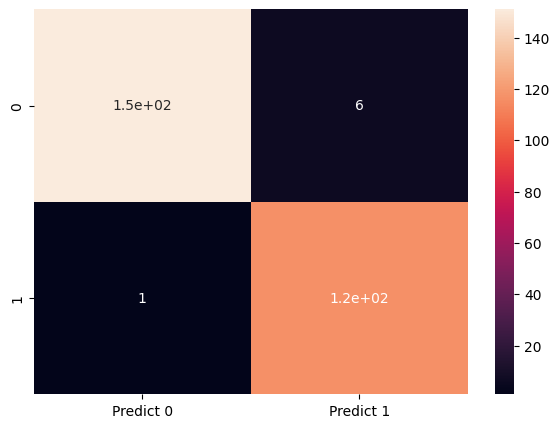

In [94]:
from sklearn import metrics

print("Confusion Matrix For Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [95]:
# 1.5e+02 = 1.5*10**2 = 150
# 1.2e+02 = 1.2*10**2 = 120

In [96]:
# Six of the ceros we wrongly predicted as one
# And 1 of the ones were wrongly predicted as cero
# Most of the time, the model predicts correctly
# This model works very well

### b)Support Vector Machine (SVM)

In [97]:
from sklearn.svm import SVC

svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)

svm_accuracies=cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n",svm_accuracies)

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [98]:
svm_pred=svm_classifier.predict(X_test)

print("Mean Accuracy: ",svm_accuracies.mean())

Mean Accuracy:  0.9854045037531277


In [99]:
accuracy_score(y_test,svm_pred)

0.9818181818181818

In [100]:
svm_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

Confusion Matrix For svm_pred


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

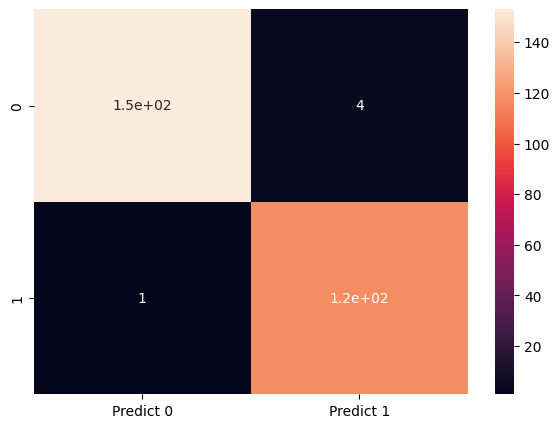

In [101]:
print("Confusion Matrix For svm_pred")
cm=metrics.confusion_matrix(y_test,svm_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [102]:
# We have similar results for this model

### c)Support Vector Machine (rbf)

Kernels in SVM classification refer to the function that is responsible for defining the decision boundaries between the classes. Apart from the classic linear kernel which assumes that the different classes are separated by a straight line, a RBF (radial basis function) kernel is used when the boundaries are hypothesized to be curve-shaped.

RBF kernel uses two main parameters, gamma and C that are related to:

1. the decision region (how spread the region is), and
2. the penalty for misclassifying a data point
respectively

In [103]:
from sklearn.svm import SVC

svm_rbf_classifier=SVC(kernel='rbf',gamma='auto')
svm_rbf_classifier.fit(X_train,y_train)

svm_rbf_accuracies=cross_val_score(estimator=svm_rbf_classifier,X=X_test,y=y_test,cv=10)
print("Accuracies:\n",svm_rbf_accuracies)
print("Mean Accuracy: ",svm_rbf_accuracies.mean())

Accuracies:
 [1.         0.96428571 1.         1.         1.         1.
 0.96296296 1.         1.         1.        ]
Mean Accuracy:  0.9927248677248677


In [104]:
# This model performs better than the others
# It is almost perfect...

In [105]:
svm_rbf_pred=svm_rbf_classifier.predict(X_test)

accuracy_score(y_test,svm_rbf_pred)

1.0

In [106]:
# It is weird and unusual, but real

In [107]:
svm_rbf_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

Confusion Matrix For svm_rbf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

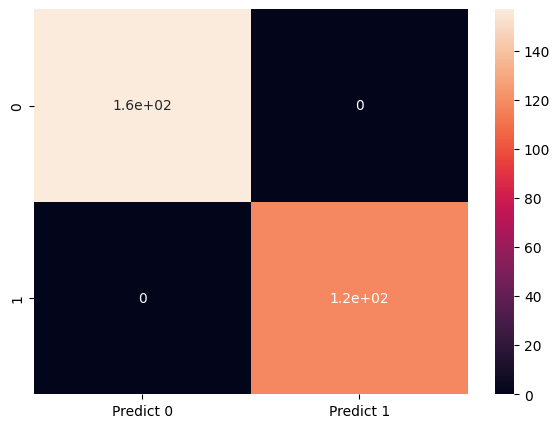

In [108]:
print("Confusion Matrix For svm_rbf")
cm=metrics.confusion_matrix(y_test,svm_rbf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [109]:
# Excellent model

### d)Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

rfc_classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
rfc_classifier.fit(X_train,y_train)
rfc_accuracies=cross_val_score(estimator=rfc_classifier,X=X_test,y=y_test,cv=10)
 
print("Accuracies:\n",rfc_accuracies)
print("Mean Accuracy: ",rfc_accuracies.mean())

Accuracies:
 [0.96428571 1.         0.89285714 0.96428571 1.         0.96296296
 1.         0.96296296 1.         1.        ]
Mean Accuracy:  0.9747354497354497


In [111]:
rdf_pred=rfc_classifier.predict(X_test)

accuracy_score(y_test,rdf_pred)

0.9963636363636363

Confusion Matrix For Random Forest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

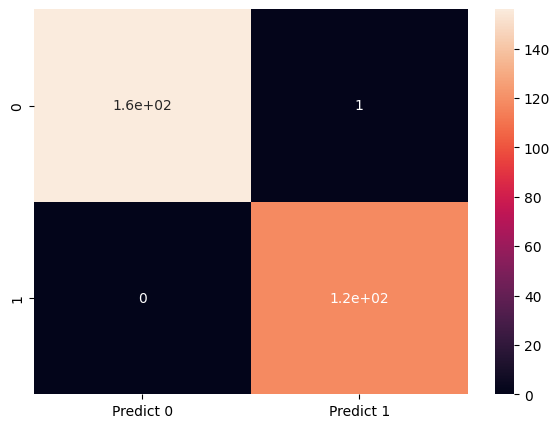

In [112]:
print("Confusion Matrix For Random Forest")
cm=metrics.confusion_matrix(y_test,rdf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [113]:
# Nice performing model as well

### e)KNeighborsClassifier

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [115]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [116]:
# We will use those parameters

In [117]:
final_KNN_Model = grid.best_estimator_

In [118]:
KNN = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2 )

In [119]:
# Call Nearest Neighbour algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [120]:
KNN_predicted = KNN.predict(X_test)

accuracy_score(y_test,KNN_predicted)

1.0

Confusion Matrix For KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

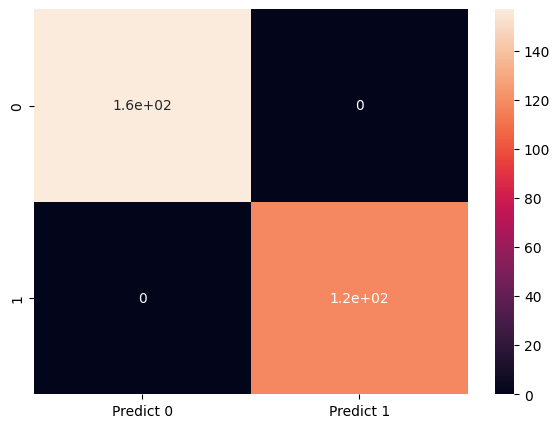

In [121]:
print("Confusion Matrix For KNN")
cm=metrics.confusion_matrix(y_test,KNN_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### f)Multilayer Perceptron

In [122]:
# This is an aditional model with neural networks

In [123]:
from sklearn.neural_network import MLPClassifier
multi_classifier=MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
multi_classifier.fit(X_train,y_train)
multi_accuracies=cross_val_score(estimator=multi_classifier,X=X_test,y=y_test,cv=10)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

Iteration 558, loss = 0.01870421
Iteration 559, loss = 0.01866518
Iteration 560, loss = 0.01862787
Iteration 561, loss = 0.01859535
Iteration 562, loss = 0.01855807
Iteration 563, loss = 0.01852122
Iteration 564, loss = 0.01848908
Iteration 565, loss = 0.01845371
Iteration 566, loss = 0.01841829
Iteration 567, loss = 0.01838373
Iteration 568, loss = 0.01834905
Iteration 569, loss = 0.01831402
Iteration 570, loss = 0.01828295
Iteration 571, loss = 0.01824622
Iteration 572, loss = 0.01821089
Iteration 573, loss = 0.01817810
Iteration 574, loss = 0.01814379
Iteration 575, loss = 0.01810960
Iteration 576, loss = 0.01807762
Iteration 577, loss = 0.01804404
Iteration 578, loss = 0.01800892
Iteration 579, loss = 0.01797557
Iteration 580, loss = 0.01794376
Iteration 581, loss = 0.01790856
Iteration 582, loss = 0.01788002
Iteration 583, loss = 0.01784143
Iteration 584, loss = 0.01781075
Iteration 585, loss = 0.01777684
Iteration 586, loss = 0.01774634
Iteration 587, loss = 0.01771389
Iteration 

In [124]:
print("Accuracies:\n",multi_accuracies)
print("Mean Accuracy: ",multi_accuracies.mean())

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy:  1.0


In [125]:
multi_predicted = multi_classifier.predict(X_test)

In [126]:
accuracy_score(y_test,multi_predicted)

1.0

Confusion Matrix For MLPClassifier


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

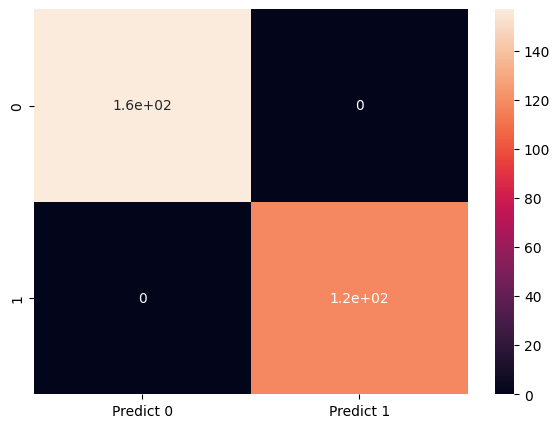

In [127]:
print("Confusion Matrix For MLPClassifier")
cm=metrics.confusion_matrix(y_test,multi_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [128]:
# The model performs very well too

## 5)Comparing each algorithm and their accuracy score

In [129]:
print("LogisticRegression:", accuracy_score(y_test,y_test_pred))
print("Support Vector Machine (using kernel=linear):", accuracy_score(y_test,svm_pred))
print("Support Vector Machine (using kernel=rbf):", accuracy_score(y_test,svm_rbf_pred))
print("RandomForestClassifier:", accuracy_score(y_test,rdf_pred))
print("KNeighborsClassifier:", accuracy_score(y_test,KNN_predicted))
print("MLPClassifier:", accuracy_score(y_test,multi_predicted))

LogisticRegression: 0.9745454545454545
Support Vector Machine (using kernel=linear): 0.9818181818181818
Support Vector Machine (using kernel=rbf): 1.0
RandomForestClassifier: 0.9963636363636363
KNeighborsClassifier: 1.0
MLPClassifier: 1.0


## 6)Conclusion

It can be seen that Support Vector Machine (using kernel=rbf), KNeighborsClassifier: 1.0 and MLPClassifier: 1.0 are having hightest accuracy score of 100% and RandomForestClassifier is also doing very great with accuracy score of 99%.

These can also be verified from the confusion matrix.

The 100% accuracy is rather weak and it is recommended to try different approaches to verify it.